In [ ]:
import zipfile

# Unzip the dataset
# local_zip = './Pre-Dataset.zip'
zip_ref = zipfile.ZipFile('./Fix_Dataset.zip', 'r')
zip_ref.extractall('./Dataset')
zip_ref.close()

zip_ref = zipfile.ZipFile('./Pre-Dataset_Test.zip', 'r')
zip_ref.extractall('./Dataset-test')
zip_ref.close()



In [ ]:
import os

# Directory with our S pictures
train_s = os.path.join('./Dataset/Fix_Dataset/S')

# Directory with our M pictures
train_m = os.path.join('./Dataset/Fix_Dataset/M')

# Directory with our L pictures
train_l = os.path.join('./Dataset/Fix_Dataset/L')

# Directory with our XL pictures
train_xl = os.path.join('./Dataset/Fix_Dataset/XL')


#TEST
# Directory with our S pictures
test_s = os.path.join('./Dataset-test/Pre-Dataset_Test/S')

# Directory with our M pictures
test_m = os.path.join('./Dataset-test/Pre-Dataset_Test/M')

# Directory with our L pictures
test_l = os.path.join('./Dataset-test/Pre-Dataset_Test/L')

# Directory with our XL pictures
test_xl = os.path.join('./Dataset-test/Pre-Dataset_Test/XL')



In [ ]:
train_s_name = os.listdir(train_s)
print(train_s_name)

train_m_name = os.listdir(train_m)
print(train_m_name)

train_l_name = os.listdir(train_l)
print(train_l_name)

train_xl_name = os.listdir(train_xl)
print(train_xl_name)

print('total training S images:', len(os.listdir(train_s)))
print('total training M images:', len(os.listdir(train_m)))
print('total training L images:', len(os.listdir(train_l)))
print('total training XL images:', len(os.listdir(train_xl)))

#TEST
test_s_name = os.listdir(test_s)
print(test_s_name)

test_m_name = os.listdir(test_m)
print(test_m_name)

test_l_name = os.listdir(test_l)
print(test_l_name)

test_xl_name = os.listdir(train_xl)
print(test_xl_name)

print('total training S images:', len(os.listdir(test_s)))
print('total training M images:', len(os.listdir(test_m)))
print('total training L images:', len(os.listdir(test_l)))
print('total training XL images:', len(os.listdir(test_xl)))

['003874_0.jpg', '004758_0.jpg', 'LEP22O000-C11@8.jpg', '005866_0.jpg', '001537_0.jpg', '003167_0.jpg', '005285_0.jpg', 'BOH22O017-K11@22.1.jpg', '003803_0.jpg', '004080_0.jpg', '001845_0.jpg', '1VJ22O04Y-Q11@10.jpg', 'IC322O01Q-Q11@8.jpg', '003150_0.jpg', '003434_0.jpg', '005489_0.jpg', '003208_0.jpg', '001635_0.jpg', 'PLB22O014-Q11@8.jpg', '002795_0.jpg', '003842_0.jpg', '003107_0.jpg', '000514_0.jpg', '004774_0.jpg', 'PLB22O014-A11@8.jpg', '004590_0.jpg', '002749_0.jpg', '002486_0.jpg', '003158_0.jpg', '005120_0.jpg', '000593_0.jpg', '001144_0.jpg', '004148_0.jpg', '003270_0.jpg', '005908_0.jpg', '003721_0.jpg', '002362_0.jpg', '003795_0.jpg', '000585_0.jpg', '000957_0.jpg', '000274_0.jpg', '000063_0.jpg', '002952_0.jpg', '001623_0.jpg', '005809_0.jpg', '004572_0.jpg', '003133_0.jpg', '003813_0.jpg', '004529_0.jpg', '004210_0.jpg', '000240_0.jpg', '005480_0.jpg', '002523_0.jpg', '003915_0.jpg', '003451_0.jpg', 'DR222O00A-Q11@8.jpg', 'IC322O01Q-A11@8.jpg', '000288_0.jpg', '000035_0.j

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 8

# Index for iterating over images
pic_index = 0

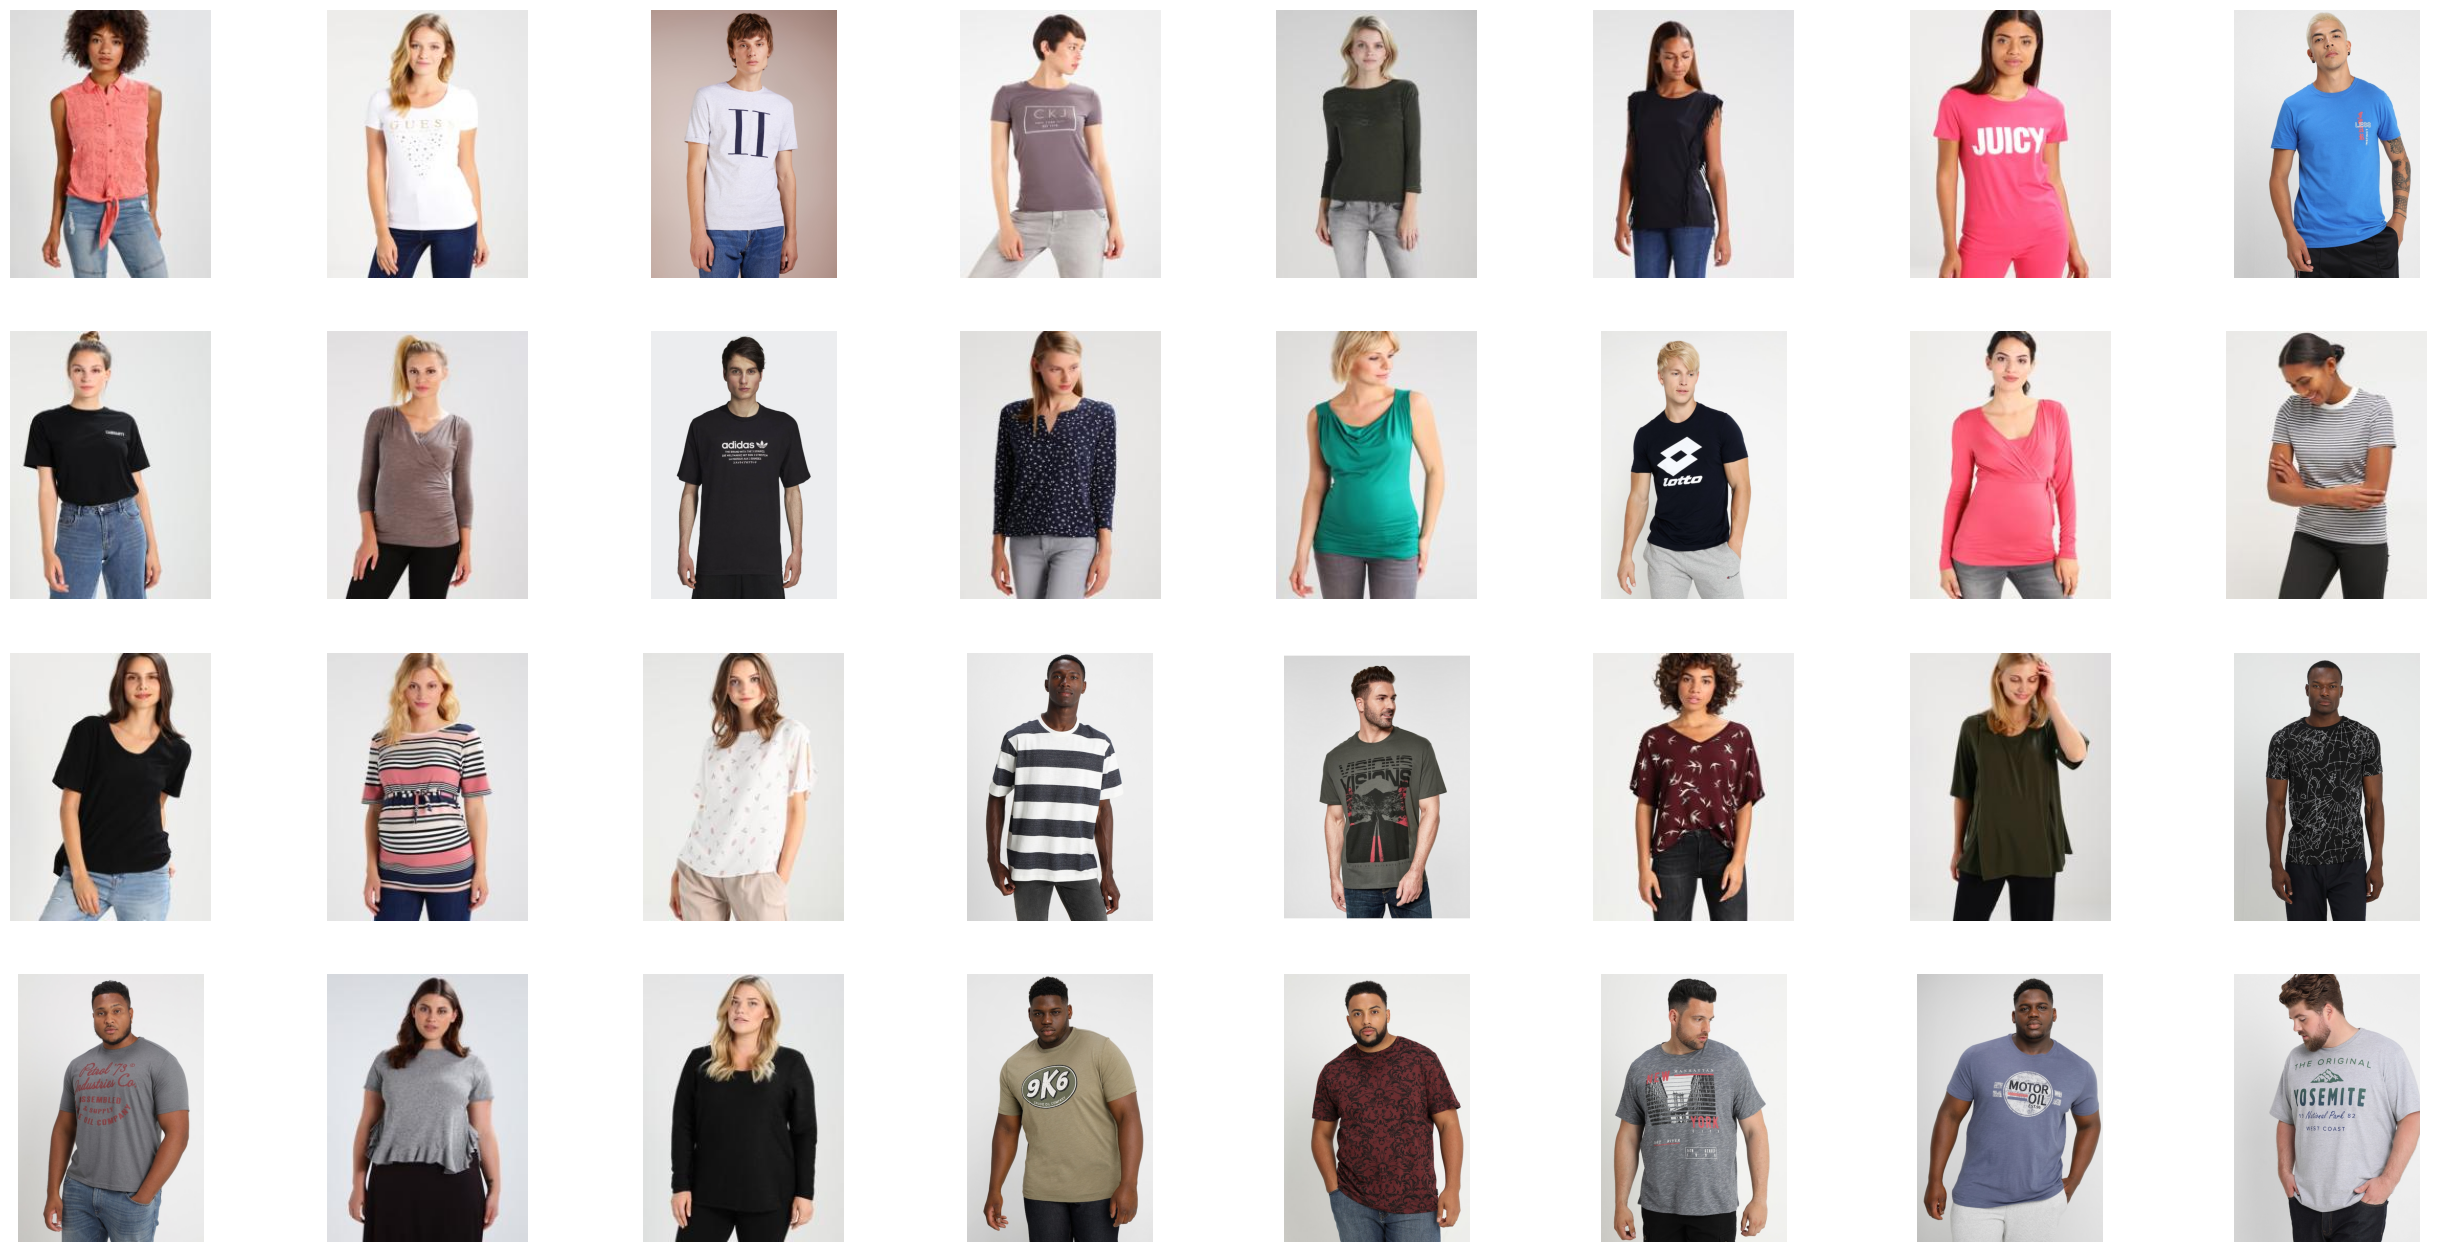

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_s_pix = [os.path.join(train_s, fname)
                for fname in train_s_name[pic_index-8:pic_index]]
next_m_pix = [os.path.join(train_m, fname)
                for fname in train_m_name[pic_index-8:pic_index]]
next_l_pix = [os.path.join(train_l, fname)
                for fname in train_l_name[pic_index-8:pic_index]]
next_xl_pix = [os.path.join(train_xl, fname)
                for fname in train_xl_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_s_pix+next_m_pix+next_l_pix+next_xl_pix):
  # img = mpimg.imread(img_path)
  # plt.imshow(img)
  # plt.axis('Off')
  # plt.show()
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)


CREATE MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
# print(tf.__version__)

In [ ]:
model_train = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 192x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 192, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    # 4 Output neuron (S,M,L,XL)
    tf.keras.layers.Dense(4, activation='softmax')

])

# Print the model summary
model_train.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 190, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 95, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 93, 32)       4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 46, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 44, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 22, 64)       

Set training parameter

In [ ]:
# Set the training parameters
model_train.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Data PreProcessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        './Dataset/Fix_Dataset/',  # This is the source directory for training images
        target_size=(256, 192),  # All images will be resized to 192x256
        batch_size=64,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        './Dataset-test/Pre-Dataset_Test/',  # This is the source directory for validation images
        target_size=(256, 192),  # All images will be resized to 192x256
        batch_size=32,
        class_mode='categorical')

class_names = train_generator.class_indices
print(class_names)

class_names_test = validation_generator.class_indices
print(class_names_test)

Found 798 images belonging to 4 classes.
Found 90 images belonging to 4 classes.
{'L': 0, 'M': 1, 'S': 2, 'XL': 3}
{'L': 0, 'M': 1, 'S': 2, 'XL': 3}


Training

In [ ]:
history = model_train.fit(
      train_generator,
      epochs=40,
      verbose=1,
      validation_data=validation_generator)

### Save Model .h5

In [ ]:
# export_dir = 'saved_model/'

# tf.saved_model.save(model_train, export_dir)

# Simpan model ke dalam file H5
model_train.save('fix_model_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Convert to **JSON**

In [ ]:
# Konversi model H5 ke dalam format JSON
json_string = model_train.to_json()

# Simpan model JSON ke dalam file
with open('fix_model_cnn.json', 'w') as json_file:
    json_file.write(json_string)

### Convert to **TFLITE**

In [ ]:
from tensorflow.keras.models import load_model
model_coba1=load_model('fix_model_cnn.h5')
# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_coba1)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke dalam file
with open('fix_model_cnn.tflite', 'wb') as tflite_file:
    tflite_file.write(tflite_model)

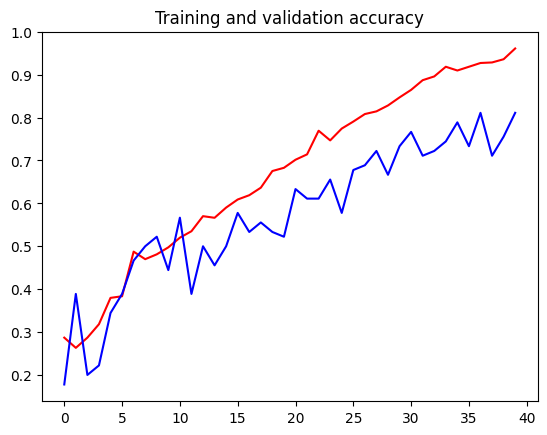

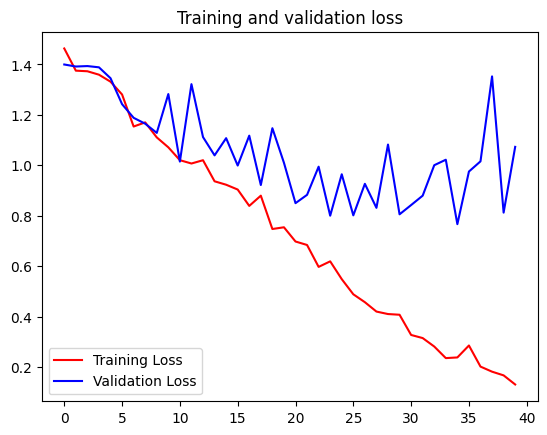

In [ ]:
# import matplotlib.pyplot as plt

# # Plot the results
# acc = history.history['accuracy']
# loss = history.history['loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.title('Training accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Prediction Test


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(256, 192))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_train.predict(images, batch_size=10)
  print(fn)
  print(classes)

  # Decode the prediction
  predicted_class_index = np.argmax(classes, axis=1)
  class_labels = ['L', 'M', 'S', 'XL/Above']  # Assuming these are your class labels
  predicted_class = class_labels[predicted_class_index[0]]

print("Predicted class:", predicted_class)
print(img)


Saving 000786_0.jpg to 000786_0.jpg
1/1 [==============================] - 0s 33ms/step
000786_0.jpg
[[3.7194081e-05 3.3659962e-04 9.9962521e-01 9.4869233e-07]]
Predicted class: S
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=192x256 at 0x79A400284850>


In [ ]:
# # BUAT COBA COBA
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image
# import os

# # Path ke gambar
# image_path = './cowok.jpg'  # Ganti dengan path gambar yang sudah diresize

# # datagen_foto = ImageDataGenerator(
# #     './000054_0.jpg',
# #     target_size=(256, 192)  # Lebar x Tinggi
# # )

# # Load gambar
# resized_img = image.load_img(image_path, target_size=(256,192))
# img_array = image.img_to_array(resized_img)

# # Tampilkan gambar
# plt.imshow(img_array / 255.0)  # Normalisasi nilai pixel menjadi 0-1
# plt.axis('off')  # Menghilangkan sumbu x dan y
# plt.show()